# Prevendo o customer churn em operações de telecom

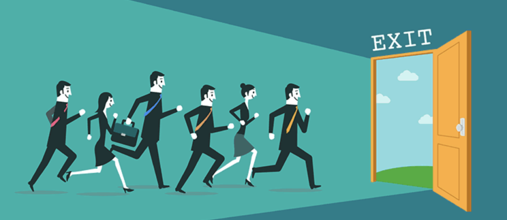

In [1]:
from IPython.display import Image
Image("Churn.png")

A empresa de Telecom precisa de um modelo que preveja se um cliente poderá ou não cancelar o seu plano e qual a probabilidade de isso ocorrer, caso ele opte no término do relacionamento comercial.

A variável "churn" será a preditiva, **o valor 0 (no)** se o cliente **continuará** com o serviço, e **1 (yes)** para o **término** do mesmo.

In [184]:
# Importando os pacotes.
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carregando os dados.
df_train = pd.read_csv("Telecom_treino.csv")
df_test = pd.read_csv("Telecom_teste.csv")

# Análise Exploratória

In [4]:
# Visualizando as primeiras linhas.
df_train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [5]:
# Visualizando os tipos de dados do dataset.
df_train.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [6]:
# Estatística dos dados.
df_train.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1667.00000,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,962.29855,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,834.00000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,1667.00000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2500.00000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,3333.00000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Visualizando os Outliers

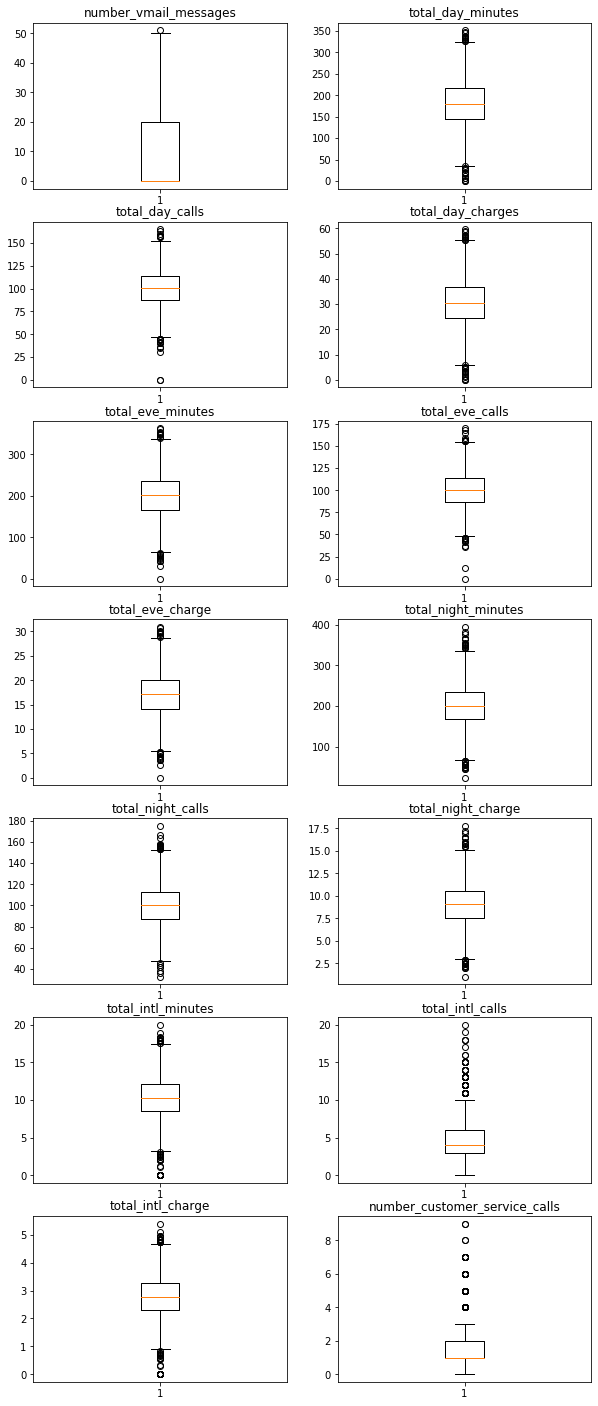

In [8]:
# Plot.
fig, axs = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 25))

axs[0, 0].boxplot(df_train["number_vmail_messages"])
axs[0, 0].set_title("number_vmail_messages")

axs[0, 1].boxplot(df_train["total_day_minutes"])
axs[0, 1].set_title("total_day_minutes")

axs[1, 0].boxplot(df_train["total_day_calls"])
axs[1, 0].set_title("total_day_calls")

axs[1, 1].boxplot(df_train["total_day_charge"])
axs[1, 1].set_title("total_day_charges")

axs[2, 0].boxplot(df_train["total_eve_minutes"])
axs[2, 0].set_title("total_eve_minutes")

axs[2, 1].boxplot(df_train["total_eve_calls"])
axs[2, 1].set_title("total_eve_calls")

axs[3, 0].boxplot(df_train["total_eve_charge"])
axs[3, 0].set_title("total_eve_charge")

axs[3, 1].boxplot(df_train["total_night_minutes"])
axs[3, 1].set_title("total_night_minutes")

axs[4, 0].boxplot(df_train["total_night_calls"])
axs[4, 0].set_title("total_night_calls")

axs[4, 1].boxplot(df_train["total_night_charge"])
axs[4, 1].set_title("total_night_charge")

axs[5, 0].boxplot(df_train["total_intl_minutes"])
axs[5, 0].set_title("total_intl_minutes")

axs[5, 1].boxplot(df_train["total_intl_calls"])
axs[5, 1].set_title("total_intl_calls")

axs[6, 0].boxplot(df_train["total_intl_charge"])
axs[6, 0].set_title("total_intl_charge")

axs[6, 1].boxplot(df_train["number_customer_service_calls"])
axs[6, 1].set_title("number_customer_service_calls")


plt.show()

Os valores **Outliers** não serão removidos, pois os mesmos possuem grandes informações.

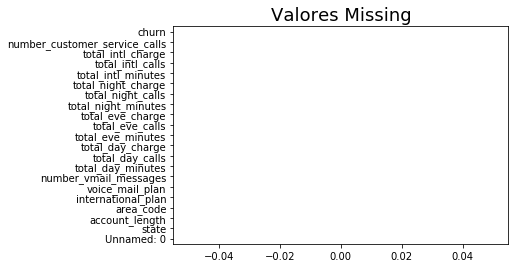

In [9]:
# Plot.
df_train.isnull().sum().plot.barh()
plt.title("Valores Missing", fontsize = 18)
plt.show()

### Média de chamadas de Atendimento ao cliente por dia

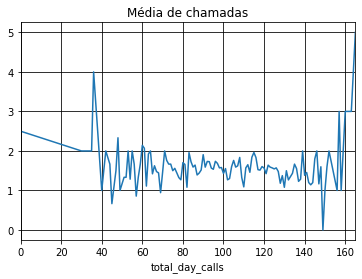

In [426]:
# Plot.
df_train.groupby("total_day_calls")["number_customer_service_calls"].mean().plot()
plt.title("Média de chamadas")
plt.rc("grid", linestyle = "-", color = "black")
plt.grid()
plt.show()

### Média de ligações internacionais por dia

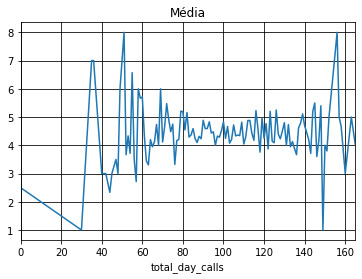

In [427]:
# Plot.
df_train.groupby(by = "total_day_calls")["total_intl_calls"].mean().plot()
plt.title("Média")
plt.rc("grid", linestyle = "-", color = "black")
plt.grid()
plt.show()


### Total de ligações e minutos por período

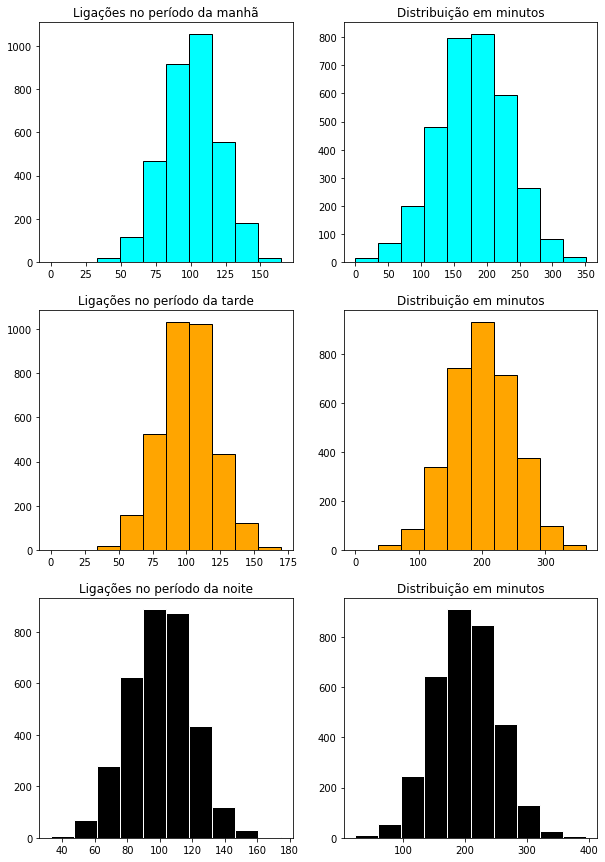

In [12]:
# Plot.
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))

axs[0, 0].hist(df_train["total_day_calls"], color = "cyan", ec = "k")
axs[0, 0].set_title("Ligações no período da manhã")


axs[0, 1].hist(df_train["total_day_minutes"], color = "cyan", ec = "k")
axs[0, 1].set_title("Distribuição em minutos")


axs[1, 0].hist(df_train["total_eve_calls"], color = "orange", ec = "k")
axs[1, 0].set_title("Ligações no período da tarde")


axs[1, 1].hist(df_train["total_eve_minutes"], color = "orange", ec = "k")
axs[1, 1].set_title("Distribuição em minutos")


axs[2, 0].hist(df_train["total_night_calls"], color = "black", ec = "w")
axs[2, 0].set_title("Ligações no período da noite")

axs[2, 1].hist(df_train["total_night_minutes"], color = "black", ec = "w")
axs[2, 1].set_title("Distribuição em minutos")

plt.show()

Nota-se que a quantidade e o tempo de duração das ligações, se encontram bem próximos.

### Percentual médio de consumo por período

In [13]:
# Instanciando os valores.
values = [30.56, 17.08, 9.04]
cols = ["Dia", "Tarde", "Noite"]

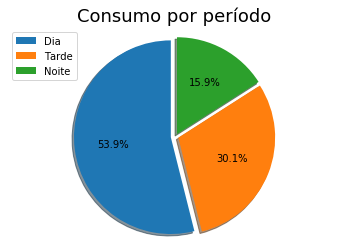

In [14]:
# Definindo o espaçamento.
explode = (0.05, 0.03, 0.03)

# Plot.
plt.pie(values, shadow = True, explode = explode, autopct="%1.1f%%", startangle = 90)
plt.legend(cols, loc = 2)
plt.title("Consumo por período", fontsize = 18)

# Proporção. 
plt.axis("equal")
plt.show()

Como mostra no gráfico acima, o consumo é consideravelmente maior durante o dia.

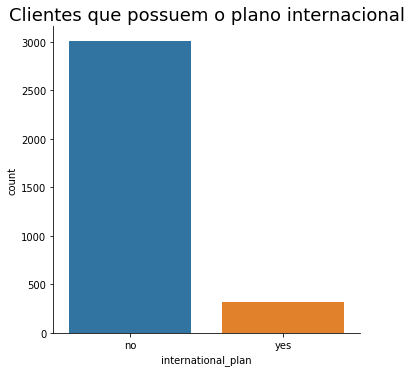

In [15]:
# Plot.
sns.catplot(x = "international_plan", kind = "count", data = df_train)
plt.title("Clientes que possuem o plano internacional", fontsize = 18)
plt.show()

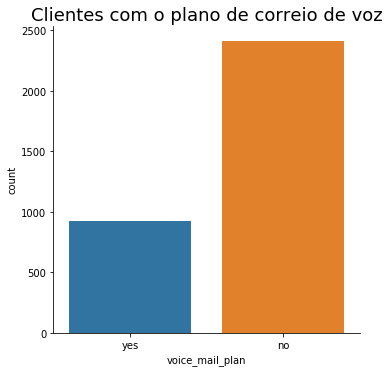

In [16]:
# Plot.
sns.catplot(x = "voice_mail_plan", kind = "count", data = df_train)
plt.title("Clientes com o plano de correio de voz", fontsize = 18)
plt.show()

In [17]:
# Total de ligações internacionais por clientes que possuem ou não o plano.
plan_int = np.sum(df_train["total_intl_calls"].loc[df_train["international_plan"] == "yes"].values)
no_plan_int = np.sum(df_train["total_intl_calls"].loc[df_train["international_plan"] == "no"].values)

# Total de gastos com ligações internacionais por clientes que possuem ou não o plano.
plan_int_charge = np.sum(df_train["total_intl_charge"].loc[df_train["international_plan"] == "yes"].values)
no_plan_int_charge = np.sum(df_train["total_intl_charge"].loc[df_train["international_plan"] == "no"].values)

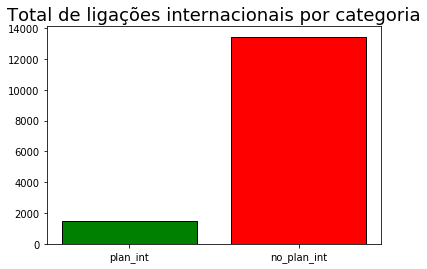

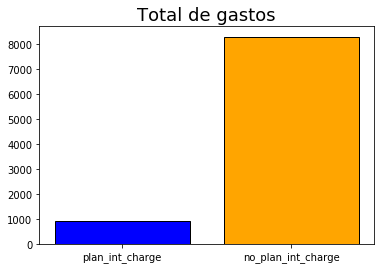

In [18]:
# Instanciando os valores.
vals1 = [plan_int, no_plan_int]
calls = ["plan_int", "no_plan_int"]

vals2 = [plan_int_charge, no_plan_int_charge]
charge = ["plan_int_charge", "no_plan_int_charge"]


# Plot.
plt.bar(calls, vals1, color = ["green", "red"], edgecolor = "black")
plt.title("Total de ligações internacionais por categoria", fontsize = 18)
plt.show()

plt.bar(charge, vals2,  color = ["blue", "orange"], edgecolor = "black")
plt.title("Total de gastos", fontsize = 18)
plt.show()

Como os dados mostram, os clientes que não possuem o plano internacional, são os que mais ligam e mais gastam. Algum tipo de serviço pode ser oferecido aos mesmos.

### Removendo algumas colunas

In [19]:
# Selecionando as variáveis.
df_train.drop(["area_code"], axis = 1, inplace = True)
df_train.drop(["state"], axis = 1, inplace = True)
df_train.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [20]:
# Visualizando os dados.
df_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### Correlação entre as varíaveis

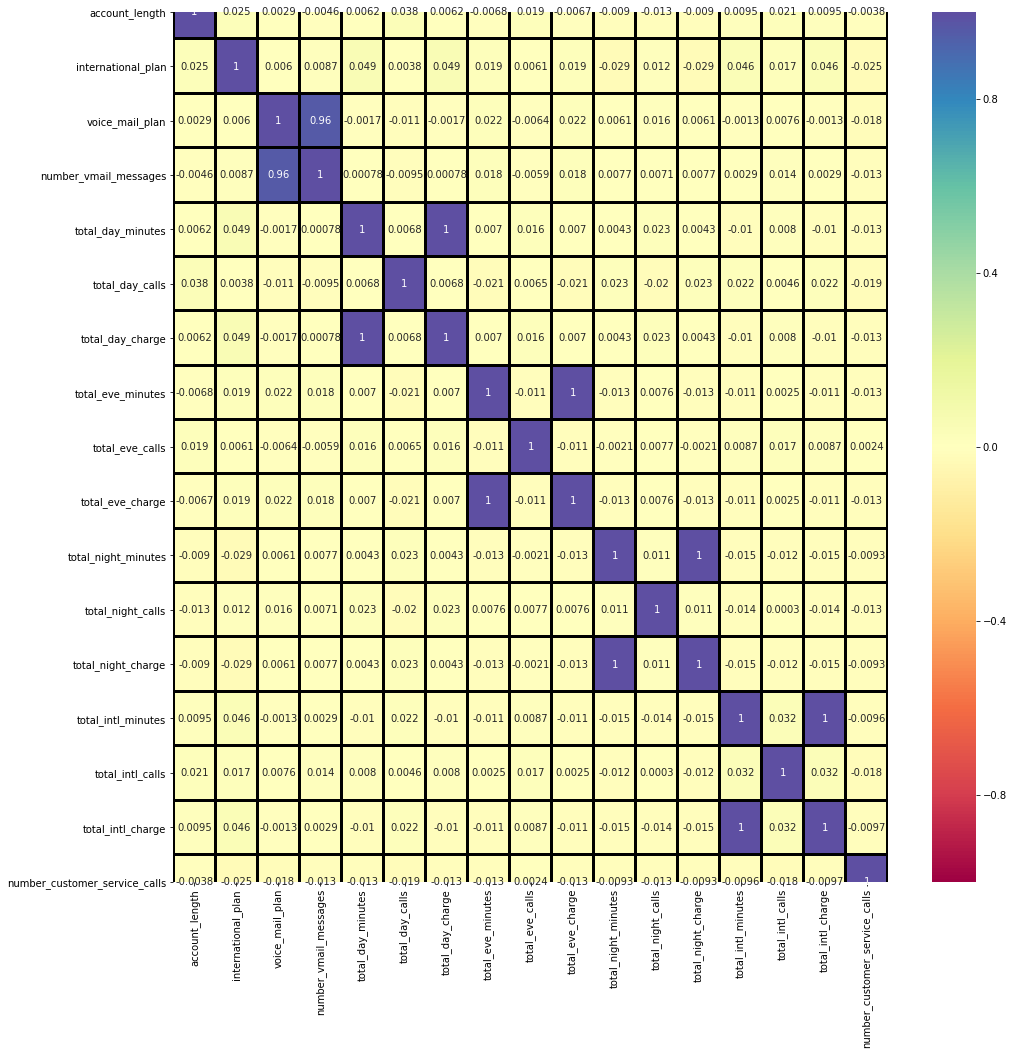

In [67]:
# Plot.
plt.subplots(figsize = (16,16))
sns.heatmap(df_train.corr(), annot = True, vmin = -1, vmax = 1, center = 0, cmap = "Spectral", linewidths = 2, linecolor= "black")
plt.show()

### Transformações de Varíaveis (Dados de treino)

In [ ]:
# Convertendo as caractéres "no" para 0, e "yes" para 1.
df_train["international_plan"] = df_train["international_plan"].replace({"no": 0, "yes": 1})
df_train["voice_mail_plan"] = df_train["voice_mail_plan"].replace({"no": 0, "yes": 1})
df_train["churn"] = df_train["churn"].replace({"no": 0, "yes": 1})

In [70]:
# Convertendo a varíavel target para o tipo categórico.
df_train["churn"] = df_train["churn"].astype("category")

### Transformações de Varíaveis (Dados de teste)

In [71]:
# Convertendo as caractéres "no" para 0, e "yes" para 1.
df_test["international_plan"] = df_test["international_plan"].replace({"no": 0, "yes": 1})
df_test["voice_mail_plan"] = df_test["voice_mail_plan"].replace({"no": 0, "yes": 1})
df_test["churn"] = df_test["churn"].replace({"no": 0, "yes": 1})

In [72]:
# Convertendo a varíavel target o tipo categórico.
df_test["churn"] = df_test["churn"].astype("category")

In [73]:
# Removendo algumas variáveis
df_test.drop(columns = ["state"], inplace = True)
df_test.drop(columns = ["area_code"], inplace = True)
df_test.drop(columns= ["Unnamed: 0"], inplace = True)

In [78]:
# Observando os dados de teste.
display(df_test.head())
df_train.dtypes

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,101,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,137,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,103,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,99,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,108,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


account_length                      int64
international_plan                  int64
voice_mail_plan                     int64
number_vmail_messages               int64
total_day_minutes                 float64
total_day_calls                     int64
total_day_charge                  float64
total_eve_minutes                 float64
total_eve_calls                     int64
total_eve_charge                  float64
total_night_minutes               float64
total_night_calls                   int64
total_night_charge                float64
total_intl_minutes                float64
total_intl_calls                    int64
total_intl_charge                 float64
number_customer_service_calls       int64
churn                            category
dtype: object

## Balanceando a  variável target

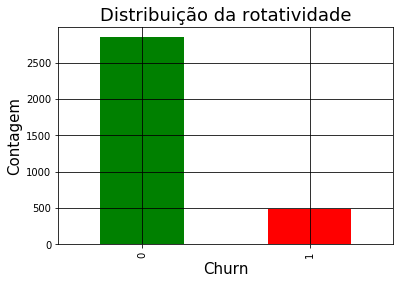

In [79]:
# Distribuição da variável TARGET.
df_train.groupby(by = df_train["churn"]).size().plot.bar(color = ("g", "r"))
plt.title("Distribuição da rotatividade", fontsize = 18)
plt.rc("grid", linestyle = "-", color = "black")
plt.xlabel("Churn", fontsize = 15)
plt.ylabel("Contagem", fontsize = 15)
plt.grid()
plt.show()

É muito claro o desequilibrio nos dados, será necessário um balanceamento para que em seguida o dataset sejá apresentado ao modelo.

In [152]:
# Separando os dados
#X = df_train.copy()
X = df_train.iloc[:,:17]
Y = df_train["churn"]

In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
# Criando a função.
rus = SMOTE(random_state = 0)

In [153]:
# Aplicando o balanceamento.
X_resampled, y_resampled = rus.fit_resample(X, Y)

In [165]:
# Shape dos dados balanceados.
display(X_resampled.shape)
y_resampled.shape

(5700, 17)

(5700, 1)

In [162]:
# Transformando o resultado em um df.
y_resampled = pd.DataFrame(y_resampled)

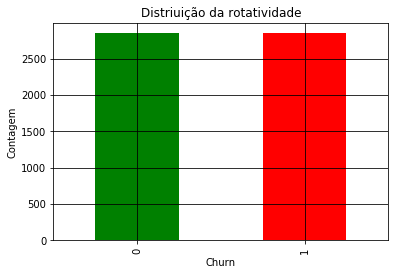

In [163]:
# Distribuição da variável TARGET após o balanceamento.
y_resampled.groupby(by = y_resampled["churn"]).size().plot.bar(color = ("g", "r"))
plt.title("Distriuição da rotatividade")
plt.rc("grid", linestyle = "-", color = "black")
plt.xlabel("Churn")
plt.ylabel("Contagem")
plt.grid()
plt.show()

Utilizamos o SMOTE, com isso geraremos dados sintéticos a partir da classe minoritária.

Agora com os dados balanceados, seguiremos a diante.

## Padronização dos dados de treino

In [166]:
# Separando os dados.
X = X_resampled
Y = y_resampled

In [168]:
# Verificando novamente a existência de valores missing.
X.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [170]:
# Aplicando a padronização.
scaler = StandardScaler().fit(X)
dfPad = scaler.transform(X)

In [171]:
# Visualizando os dados.
print("Dados originais: \n\n", df_train.values[0:3,:])
print("\n\nDados padronizados: \n\n", dfPad[0:3,:])

Dados originais: 

 [[128 0 1 25 265.1 110 45.07 197.4 99 16.78 244.7 91 11.01 10.0 3 2.7 1 0]
 [107 0 1 26 161.6 123 27.47 195.5 103 16.62 254.4 103 11.45 13.7 3 3.7 1
  0]
 [137 0 0 0 243.4 114 41.38 121.2 110 10.3 162.6 104 7.32 12.2 5 3.29 0 0]]


Dados padronizados: 

 [[ 0.70849445 -0.32547986  2.06827894  1.49770843  1.21770819  0.47863535
   1.21793777 -0.15291486 -0.05069185 -0.15272353  0.86804065 -0.48692477
   0.86725252 -0.1714353  -0.49839454 -0.17226844 -0.48628548]
 [ 0.15936285 -0.32547986  2.06827894  1.57895379 -0.47087148  1.15356502
  -0.47111055 -0.19096943  0.16373751 -0.19042529  1.07123523  0.15842108
   1.07206715  1.25665067 -0.49839454  1.25729788 -0.48628548]
 [ 0.94383656 -0.32547986 -0.48349378 -0.53342571  0.86367748  0.68630602
   0.86381344 -1.67910335  0.5389889  -1.67964497 -0.85178148  0.21219991
  -0.85039741  0.6776969   0.36626803  0.67117569 -1.17993595]]


## Padronização dos dados de teste

In [174]:
# Separando os dados.
x = df_test.iloc[:,:17]
y = df_test["churn"]

In [176]:
# Verificando valores missing.
x.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [177]:
# Aplicando a padronização.
scaler = StandardScaler().fit(x)
dfPadTest = scaler.transform(x)

In [178]:
# Visualizando os dados.
print("\nDados originais: \n\n", x.values[0:3,:])
print("\nDados padronizados: \n\n", dfPadTest[0:3,:])


Dados originais: 

 [[101.     0.     0.     0.    70.9  123.    12.05 211.9   73.    18.01
  236.    73.    10.62  10.6    3.     2.86   3.  ]
 [137.     0.     0.     0.   223.6   86.    38.01 244.8  139.    20.81
   94.2   81.     4.24   9.5    7.     2.57   0.  ]
 [103.     0.     1.    29.   294.7   95.    50.1  237.3  105.    20.17
  300.3  127.    13.51  13.7    6.     3.7    1.  ]]

Dados padronizados: 

 [[ 0.05974595 -0.3144509  -0.56280161 -0.53417159 -2.09453397  1.23091002
  -2.09494524  0.23797956 -1.39284182  0.2375782   0.72525909 -1.28154132
   0.72520796  0.10717979 -0.55069344  0.10373945  1.09840451]
 [ 0.9737082  -0.3144509  -0.56280161 -0.53417159  0.80210028 -0.68407003
   0.80181634  0.89312574  1.96900893  0.89354982 -2.08701212 -0.89527736
  -2.08669902 -0.30040126  1.08495193 -0.29431405 -1.23116333]
 [ 0.11052163 -0.3144509   1.77682504  1.65760038  2.15082782 -0.21826407
   2.15088596  0.74377631  0.23714642  0.74361345  2.00049913  1.32574039
   1.9989401

## Modelo 1 (Logistic Regression)

In [179]:
# Divindo os dados em treino e teste.
teste_size = 0.30

In [180]:
# Criando os conjuntos.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(dfPad, Y, test_size = teste_size, random_state = 0)

In [182]:
# Instânciando e aplicando o modelo.
modelo1 = LogisticRegression()

In [185]:
modelo1.fit(X_treino, Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
# Prevendo e gerando a confusion matrix.
y_pred = modelo1.predict(X_teste)
matrix = confusion_matrix(Y_teste, y_pred)

In [187]:
# Vizualizando a matrix.
print(matrix)

[[619 230]
 [202 659]]


In [188]:
# Score do modelo em treino.
result = accuracy_score(Y_teste, y_pred)
print("Acurácia do treino: %.2f%%" % (result * 100.0))

Acurácia do treino: 74.74%


## Modelo 2 (KNN)

In [397]:
# Importando os pacotes.
from sklearn.neighbors import KNeighborsClassifier

In [398]:
# Divisão em dados de treino e de teste.
X_treino, testeData, Y_treino, testeLabels = train_test_split(dfPad, Y, test_size = 0.30, random_state = 0)

In [399]:
# Divisão dos dados de treino em dados de treino e dados de validação.
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino, 
                                                                    Y_treino, 
                                                                    test_size = 0.1, 
                                                                    random_state = 0)

In [400]:
# Range de valores de k que iremos testar.
kVals = range(1, 30, 2)

In [401]:
# Lista vazia para receber as acurácias.
acuracias = []

In [402]:
# Loop em todos os valores de k para testar cada um deles.
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(treinoData, treinoLabels)
          
    # Avaliando o modelo e atualizando a lista de acurácias.
    score = modeloKNN.score(validData, validLabels)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)

Com valor de k = 1, a acurácia é = 89.72%
Com valor de k = 3, a acurácia é = 87.22%
Com valor de k = 5, a acurácia é = 88.72%
Com valor de k = 7, a acurácia é = 87.47%
Com valor de k = 9, a acurácia é = 87.97%
Com valor de k = 11, a acurácia é = 86.97%
Com valor de k = 13, a acurácia é = 86.72%
Com valor de k = 15, a acurácia é = 86.22%
Com valor de k = 17, a acurácia é = 84.71%
Com valor de k = 19, a acurácia é = 83.71%
Com valor de k = 21, a acurácia é = 83.96%
Com valor de k = 23, a acurácia é = 82.46%
Com valor de k = 25, a acurácia é = 81.70%
Com valor de k = 27, a acurácia é = 81.95%
Com valor de k = 29, a acurácia é = 81.95%


In [403]:
# Obtendo o valor de k que apresentou a maior acurácia.
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             acuracias[i] * 100))

O valor de k = 1 alcançou a mais alta acurácia de 89.72% nos dados de validação!


In [404]:
# Versão final do modelo com o melhor valor de K.
modelo = KNeighborsClassifier(n_neighbors = kVals[i])

In [405]:
# Treinamento do modelo.
modelo.fit(treinoData, treinoLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [406]:
# Previsões com os dados de teste.
predictions = modelo.predict(testeData)

In [407]:
# Confusion Matrix.
print ("Confusion matrix")
print(confusion_matrix(testeLabels, predictions))

Confusion matrix
[[673 176]
 [ 22 839]]


In [408]:
# Fazendo a avaliação com os dados de treino.
accuracy = accuracy_score(testeLabels, predictions)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 88.42%


## Modelo 3 (Logistic Regression + Classification Report)

In [249]:
# Importando o pacote.
from sklearn.metrics import classification_report

In [250]:
# Divisão dos dados.
size = 0.30

In [251]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(dfPad, Y, test_size = size, random_state = 0)

In [252]:
# Criando o modelo
modelo3 = LogisticRegression()
modelo3.fit(X_treino, Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
# Fazendo as previsões e construindo o relatório
previsoes = modelo3.predict(X_teste)

In [253]:
# Fazendo a avaliação com os dados de treino.
accuracy = accuracy_score(Y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 74.74%


## Modelo 4 (SVM)

In [412]:
# Carregando os pocotes.
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [414]:
# Número de folds.
folds = 10

In [415]:
# Separando os dados em folds.
kfold = KFold(folds, True, random_state = 0)

In [416]:
# Instânciando o modelo.
modelo = SVC(probability = True)

In [417]:
# Treinando o modelo.
modelo.fit(X_treino, y_treino)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [418]:
# Fazendo as previsões.
y_prev = modelo.predict(X_teste)

In [419]:
# Confusion Matrix.
matrix = confusion_matrix(y_teste, y_prev)
print(matrix)

[[781  68]
 [127 734]]


In [420]:
# Fazendo a avaliação.
ac = accuracy_score(y_teste, y_prev)
print("Acurácia do modelo: %.2f%%" % (ac * 100))

Acurácia do modelo: 88.60%


## Aplicando o modelo nos dados de teste

In [421]:
# Modelo.
modelo.fit(dfPadTest, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [422]:
# Score do modelo em teste.
result = modelo.score(dfPadTest, y)
print("Acurácia do treino: %.2f%%" % (result * 100.0))

Acurácia do treino: 95.44%


In [423]:
# Verificando a probabilidade de churn.
prob = modelo.predict_proba(dfPadTest)
print('O cliente tem {}% de probabilidade de cancelar o contrato.'\
      .format(round(prob[:,1][30]*100, 2)))

O cliente tem 8.89% de probabilidade de cancelar o contrato.


In [424]:
# Convertendo o resultado para o dataframe.
df = pd.DataFrame(prob[:,1].round(2) * 100)

In [425]:
df.head(10)

,0
0,19.0
1,3.0
2,10.0
3,4.0
4,0.0
5,1.0
6,1.0
7,2.0
8,9.0
9,2.0


### Salvando os resultados

In [395]:
# Salvando os resultados em um CSV.
df.to_csv("Result_churn.csv", index = False)

# Conclusão 

Os dados foram observados durante a análise exploratória e diversos gráficos foram extraídos. Como foi mostrando nos boxsplots, os dados possuem Outliers, porem possuem informações relevantes, e não foram tratados. Não foram encontrados valores missing.

Dois padrões foram encontrados: Mais de **50%** das ligações, são realizadas no período diurno, e a grande maioria dos clientes que efetuam ligações internacionais, **não possuem** o plano internacional, gerando um custo muito mais alto.

Algumas variáveis foram transformadas, para que fossem apresentadas ao modelo da forma adequeda.
Na variável target **"churn"**, as informações iniciais estavam totalmente **desequilibradas**, onde possuíam cerca de 460% a mais de registros negativos do que positivos. Para que o modelo não aprendesse mais de uma característica do que de outra, 
foi realizado um processo de balanceamento, ou seja, a quantidade de registros de cada categorias (sim ou não) deveriam estar próximas de 50% para ambas.

O modelo na qual teve a melhor performance foi o **SVM**, com uma acurácia de **88.60%** no dados de treino e nos dados de teste de **95.44%**.
Por fim foi gerado um csv para possilvemente alimentar um dashboard ou uma aplicação web.